In [1]:
import pandas as pd
import numpy as np

In [3]:
nasdaqFile = "/users/nirmalanawale/nirmi/myworkspace/python/data/nasdaq.csv"
spFile = "/users/nirmalanawale/nirmi/myworkspace/python/data/sp_500.csv"
googFile = "/users/nirmalanawale/nirmi/myworkspace/python/data/goog.csv"
oilFile = "/users/nirmalanawale/nirmi/myworkspace/python/data/uso.csv"
xomFile = "/users/nirmalanawale/nirmi/myworkspace/python/data/xom.csv"

In [4]:
data = pd.read_csv(googFile, sep = ",", usecols =[0,6], names = ["Date", "Price"], header = 0)

In [5]:
data.head()

,Date,Price
0,2018-07-27,2130600
1,2018-07-30,1849900
2,2018-07-31,1644700
3,2018-08-01,1567200
4,2018-08-02,1531300


In [6]:
#index is 0 based. Price[1:] -> 2nd element to last 
returns = np.array(data["Price"][:-1] , np.float)/np.array(data["Price"][1:], np.float) - 1

In [9]:
data["Returns"] = np.append(returns, np.nan)

In [14]:
data.index = data["Date"]
data.head()

,Date,Price,Returns
Date,,,
2018-07-27,2018-07-27,2130600,0.151738
2018-07-30,2018-07-30,1849900,0.124764
2018-07-31,2018-07-31,1644700,0.049451
2018-08-01,2018-08-01,1567200,0.023444
2018-08-02,2018-08-02,1531300,0.405378


In [16]:
def readFile(filename):
    data = pd.read_csv(filename, sep = ",", usecols =[0,6], names = ["Date", "Price"], header = 0)
    returns = np.array(data["Price"][:-1] , np.float)/np.array(data["Price"][1:], np.float) - 1
    data["Returns"] = np.append(returns, np.nan)
    data.index = data["Date"]
    return data
    

In [17]:
googData = readFile(googFile)
nasdaqData = readFile(nasdaqFile)

In [24]:
googData.tail()


,Date,Price,Returns
Date,,,
2018-10-22,2018-10-22,1514200,-0.180938
2018-10-23,2018-10-23,1848700,-0.067444
2018-10-24,2018-10-24,1982400,-0.221306
2018-10-25,2018-10-25,2545800,-0.391859
2018-10-26,2018-10-26,4186200,NaN


In [25]:
nasdaqData.tail()

,Date,Price,Returns
Date,,,
2018-10-22,2018-10-22,2282400000,-0.165735
2018-10-23,2018-10-23,2735820000,-0.068038
2018-10-24,2018-10-24,2935550000,0.070661
2018-10-25,2018-10-25,2741810000,-0.075206
2018-10-26,2018-10-26,2964780000,NaN


In [29]:
# x column data for regression in Python has to 1dimensional array of each element is array 
# here x = NASDAQ data returns
# y = Google data Returns
# we are also excluding last row, bcoz of NaN 
xData = nasdaqData["Returns"][0:-1].values.reshape(-1,1)


In [32]:
yData = googData["Returns"][0:-1]

In [35]:
xData

array([[ 0.01528406],
       [-0.02352566],
       [-0.01281734],
       [ 0.06834671],
       [ 0.03101006],
       [-0.09805779],
       [ 0.01846568],
       [ 0.05256125],
       [ 0.02700509],
       [-0.02970151],
       [ 0.09452315],
       [-0.00162724],
       [-0.16161192],
       [ 0.15529871],
       [ 0.07399832],
       [ 0.08486318],
       [-0.03829891],
       [ 0.06394011],
       [-0.11672491],
       [-0.00355666],
       [-0.18650528],
       [ 0.18244532],
       [ 0.03389562],
       [-0.05830376],
       [ 0.06028707],
       [-0.147839  ],
       [-0.141429  ],
       [ 0.09629836],
       [ 0.10356973],
       [ 0.05139974],
       [-0.12013671],
       [-0.0092491 ],
       [ 0.00997533],
       [ 0.14013729],
       [-0.10963426],
       [-0.01460317],
       [ 0.0747706 ],
       [-0.05702293],
       [-0.38298865],
       [ 0.53403852],
       [ 0.05604552],
       [-0.00387022],
       [ 0.11844559],
       [-0.11625515],
       [ 0.01783   ],
       [-0

In [34]:
yData

Date
2018-07-27    0.151738
2018-07-30    0.124764
2018-07-31    0.049451
2018-08-01    0.023444
2018-08-02    0.405378
2018-08-03    0.007303
2018-08-06   -0.275971
2018-08-07    0.090272
2018-08-08    0.627821
2018-08-09   -0.240732
2018-08-10    0.157186
2018-08-13   -0.289296
2018-08-14   -0.262850
2018-08-15    0.361525
2018-08-16   -0.033391
2018-08-17    0.595774
2018-08-20   -0.277704
2018-08-21    0.358576
2018-08-22   -0.105984
2018-08-23    0.048595
2018-08-24   -0.181354
2018-08-27   -0.113267
2018-08-28    0.003926
2018-08-29   -0.024410
2018-08-30   -0.267012
2018-08-31   -0.007974
2018-09-04   -0.111726
2018-09-05    0.091501
2018-09-06    0.347677
2018-09-07    0.256321
                ...   
2018-09-14   -0.277459
2018-09-17    0.085494
2018-09-18    0.010240
2018-09-19   -0.015372
2018-09-20   -0.725350
2018-09-21    2.466247
2018-09-24    0.299990
2018-09-25   -0.331396
2018-09-26    0.159819
2018-09-27   -0.086774
2018-09-28    0.016942
2018-10-01   -0.195687
2018-1

In [36]:
from sklearn import datasets, linear_model

In [37]:
good_googModel = linear_model.LinearRegression()

In [38]:
good_googModel.fit(xData, yData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# R-Sqaure value
good_googModel.score(xData, yData)

0.4641417372642398

In [40]:
# attribute coef_ -> coefficient (slop)
good_googModel.coef_

array([2.20629884])

In [41]:
#intercept
good_googModel.intercept_

0.04952870353888754

In [43]:
# residuals
good_googModel._residues

6.478972684984468

In [44]:
import matplotlib.pyplot as plt

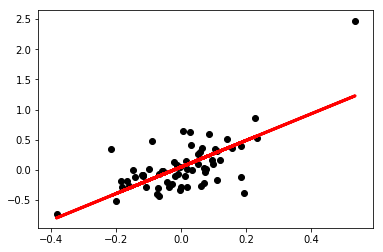

In [48]:
plt.scatter(xData, yData, color = "black")
plt.plot(xData, good_googModel.predict(xData), color = "red", linewidth = 3)